# AVOCADO PROJECT PROBLEM STATEMENT

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


>task is to make a mode that can consider the data provided and predict the Average Price.

# IMPORTING THE DATASETS

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


top 5 heads of the dataset.

In [117]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


bottom 5 of the datasets.

In [14]:
df.shape

(1517, 14)

We have 1517 rows and 14 columns in the dataset.

# CHECKING NULL VALUES IN THE DATAFRAME

In [118]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
PLU4046         0
PLU4225         0
PLU4770         0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values in the dataset.

<AxesSubplot:>

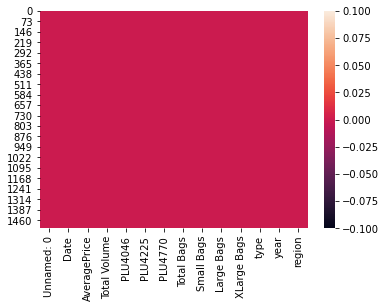

In [119]:
# Checking null values through heatmap
sns.heatmap(df.isnull())

Heatmap is showing no null values in the dataset.

 # CHECKING DATATYPES OF THE COLUMNS

In [120]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
PLU4046         float64
PLU4225         float64
PLU4770         float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

we have 2 integer data type columns, 3 object data type columns and remaining all columns are for float data type.

In [121]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', 'PLU4046',
       'PLU4225', 'PLU4770', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

 # SHOWING INTEGER TYPE COLUMNS

In [122]:
int_col=[]

for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
        int_col.append(x)
        
int_col        

['Unnamed: 0', 'year']

In [22]:
# Showing unique values
df['year'].value_counts(())

2015    1270
2016     247
Name: year, dtype: int64

In year column 2015 showing 1270 number of counts and 2016 showing 247 number of counts.

 # SHOWING FLOAT TYPE COLUMNS

In [123]:
float_col=[]

for x in df.dtypes.index:
    if df.dtypes[x]=='float64':
        float_col.append(x)
        
float_col        

['AveragePrice',
 'Total Volume',
 'PLU4046',
 'PLU4225',
 'PLU4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']

 # SHOWING OBJECT  TYPE COLUMNS



In [124]:
cat_col=[]

for x  in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
        
cat_col        

['Date', 'type', 'region']

In [30]:
# showing unique values
df['Date'].unique()

array(['27-12-2015', '20-12-2015', '13-12-2015', '06-12-2015',
       '29-11-2015', '22-11-2015', '15-11-2015', '08-11-2015',
       '01-11-2015', '25-10-2015', '18-10-2015', '11-10-2015',
       '04-10-2015', '27-09-2015', '20-09-2015', '13-09-2015',
       '06-09-2015', '30-08-2015', '23-08-2015', '16-08-2015',
       '09-08-2015', '02-08-2015', '26-07-2015', '19-07-2015',
       '12-07-2015', '05-07-2015', '28-06-2015', '21-06-2015',
       '14-06-2015', '07-06-2015', '31-05-2015', '24-05-2015',
       '17-05-2015', '10-05-2015', '03-05-2015', '26-04-2015',
       '19-04-2015', '12-04-2015', '05-04-2015', '29-03-2015',
       '22-03-2015', '15-03-2015', '08-03-2015', '01-03-2015',
       '22-02-2015', '15-02-2015', '08-02-2015', '01-02-2015',
       '25-01-2015', '18-01-2015', '11-01-2015', '04-01-2015',
       '25-12-2016', '18-12-2016', '11-12-2016', '04-12-2016',
       '27-11-2016', '20-11-2016', '13-11-2016', '06-11-2016',
       '30-10-2016', '23-10-2016', '16-10-2016', '09-10

So many unique values are available in the 'Date' column.

In [31]:
df['type'].unique

<bound method Series.unique of 0       conventional
1       conventional
2       conventional
3       conventional
4       conventional
            ...     
1512    conventional
1513    conventional
1514    conventional
1515    conventional
1516    conventional
Name: type, Length: 1517, dtype: object>

So many unique values are available in the 'type' column.

In [32]:
df['region'].unique

<bound method Series.unique of 0          Albany
1          Albany
2          Albany
3          Albany
4          Albany
          ...    
1512    Charlotte
1513    Charlotte
1514    Charlotte
1515    Charlotte
1516    Charlotte
Name: region, Length: 1517, dtype: object>

So many unique values are available in the 'region' column.

# CHECKING VALUE COUNTS OF THE COLUMNS


In [125]:
for col in df:
    print(col)
    print(df[col].value_counts())
    print()

Unnamed: 0
37    40
38    40
36    39
39    38
33    38
40    38
35    38
41    37
34    37
43    36
42    36
44    35
32    34
45    34
29    33
46    33
31    33
30    32
28    31
47    30
6     28
5     28
4     28
3     28
1     28
27    28
2     28
48    27
7     27
0     27
49    26
26    26
25    26
8     26
20    25
12    24
50    24
21    24
19    24
18    24
17    24
9     24
24    24
10    24
11    24
51    23
13    23
14    23
16    23
22    23
23    23
15    21
Name: Unnamed: 0, dtype: int64

Date
05-04-2015    34
12-04-2015    34
19-04-2015    33
29-03-2015    32
26-04-2015    32
              ..
19-06-2016     3
03-07-2016     3
24-07-2016     3
04-09-2016     3
11-09-2016     2
Name: Date, Length: 104, dtype: int64

AveragePrice
1.08    46
0.99    44
1.03    44
1.09    43
1.10    43
        ..
0.52     1
1.50     1
0.51     1
1.53     1
1.46     1
Name: AveragePrice, Length: 113, dtype: int64

Total Volume
394035.19     1
115089.62     1
114328.40     1
275260.08     1


# VISUALIZATION OF DATAFRAME

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

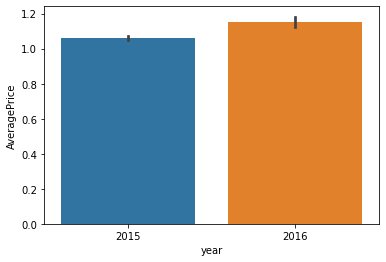

In [37]:
# through barplot plot comparison between year and average price
sns.barplot(x='year', y='AveragePrice',data=df)

Barplot is showing maximum averagae price was in year 2016.

# CHECKING DISTRIBUTION

In [126]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
PLU4046         float64
PLU4225         float64
PLU4770         float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

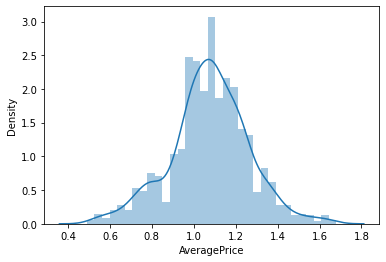

In [41]:
sns.distplot(df['AveragePrice'],kde=True)

Distribution plot is showing average price range between 0.4 to 1.8.

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

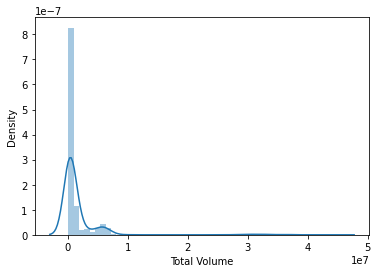

In [44]:
sns.distplot(df['Total Volume'],kde=True)

Total Volume ranges in between 0 to 1 and it is left skewed.

<AxesSubplot:xlabel='PLU4046', ylabel='Density'>

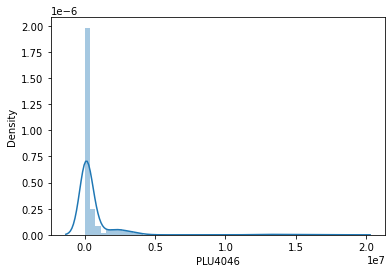

In [127]:
sns.distplot(df['PLU4046'],kde=True)

'PLU4046' column is indicating Total number of avocado with PLU(size of the avocado) and ranges in between 0 to .5 and it is left skewed.

<AxesSubplot:xlabel='PLU4770', ylabel='Density'>

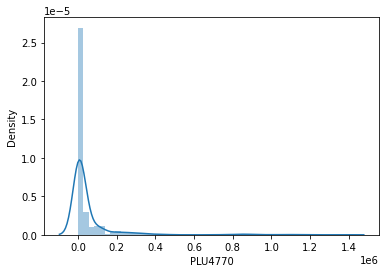

In [128]:
sns.distplot(df['PLU4770'],kde=True)

'P4770' column is indicating Total number of avocado with PLU(size of the avocado) and ranges in between 0 to approx 0.4 and it is left skewed.

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

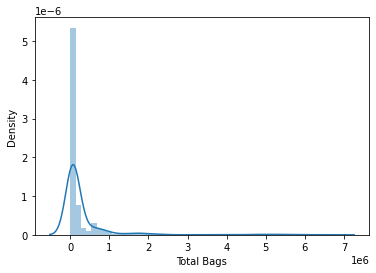

In [47]:
sns.distplot(df['Total Bags'],kde=True)

Total Bags ranges in between 0 to approx 1.5 and left skewed.

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

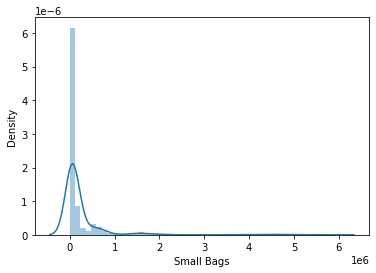

In [48]:
sns.distplot(df['Small Bags'],kde=True)

Small Bags ranges in between 0 to 1 and it is left skewed.

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

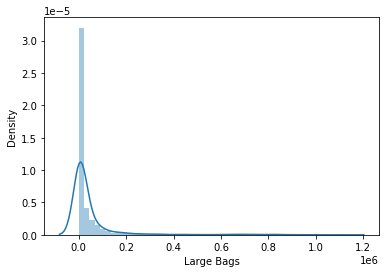

In [49]:
sns.distplot(df['Large Bags'],kde=True)

Large Bags ranges in between 0 to 0.2 and it is left skewed.

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

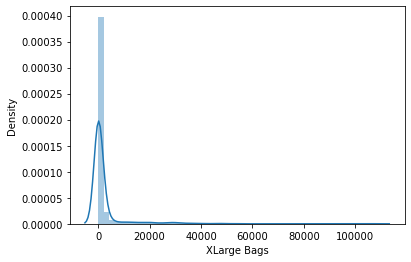

In [50]:
sns.distplot(df['XLarge Bags'],kde=True)

XLarge Bags ranges in between 0 to approx 16000 and it is left skewed.

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'PLU4046'}>],
       [<AxesSubplot:title={'center':'PLU4225'}>,
        <AxesSubplot:title={'center':'PLU4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

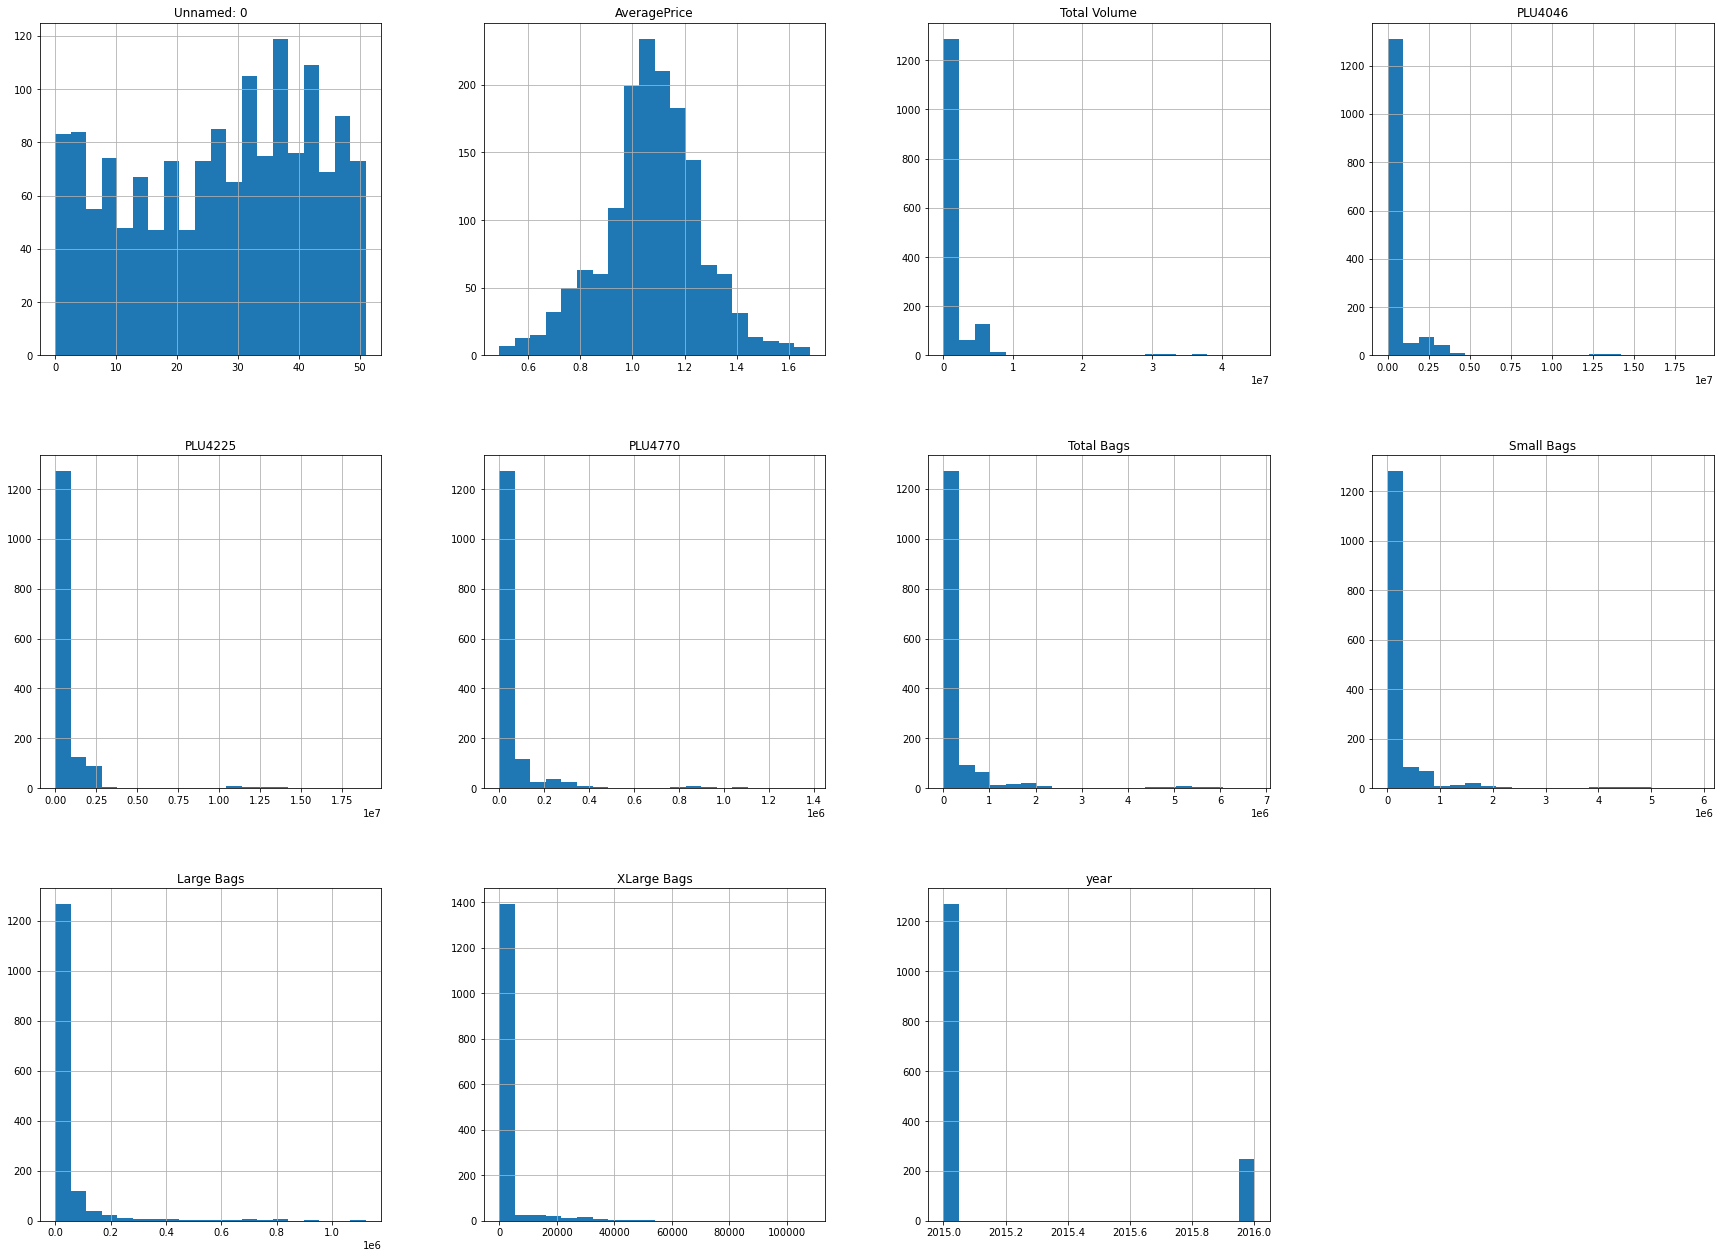

In [129]:
# visualizing through histogram

df.hist(figsize=(30,30),grid=True,layout=(4,4),bins=20)

In this above Histogram only average price column is  looking normally distributed , and rest all are looking left skewed.

# BIVARIATE ANALYSIS

In [130]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', 'PLU4046',
       'PLU4225', 'PLU4770', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

<AxesSubplot:title={'center':' comparison between Date  and AveragePrice'}, xlabel='Date', ylabel='AveragePrice'>

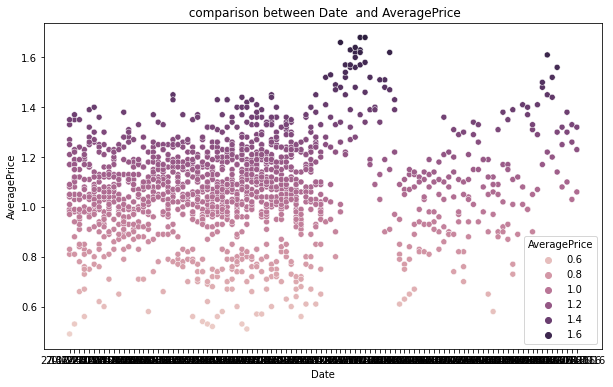

In [55]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Date  and AveragePrice')
sns.scatterplot(df['Date'], df['AveragePrice'],hue=df['AveragePrice'])

Scatter Plot is showing postivity ,dark dot is showing maximum average price and light dot is showing minimum average price.

<AxesSubplot:title={'center':' comparison between Total Volume  and AveragePrice'}, xlabel='Total Volume', ylabel='AveragePrice'>

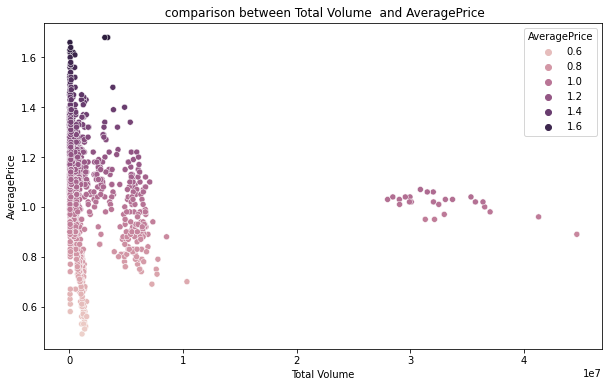

In [56]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Total Volume  and AveragePrice')
sns.scatterplot(df['Total Volume'], df['AveragePrice'],hue=df['AveragePrice'])

scatter plot is showing two groups of dots ,with not much positivity.

<AxesSubplot:title={'center':' comparison between PLU4046  and AveragePrice'}, xlabel='PLU4046', ylabel='AveragePrice'>

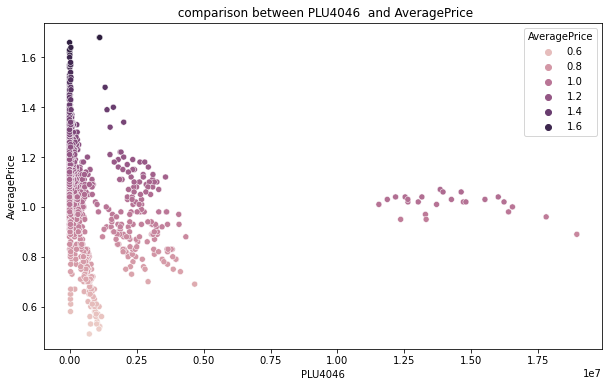

In [131]:
plt.figure(figsize=[10,6])
plt.title(' comparison between PLU4046  and AveragePrice')
sns.scatterplot(df['PLU4046'], df['AveragePrice'],hue=df['AveragePrice'])

In this scatter plot there is two groups of dots ,with not  much positivity.

<AxesSubplot:title={'center':' comparison between PLU4225 and AveragePrice'}, xlabel='PLU4225', ylabel='AveragePrice'>

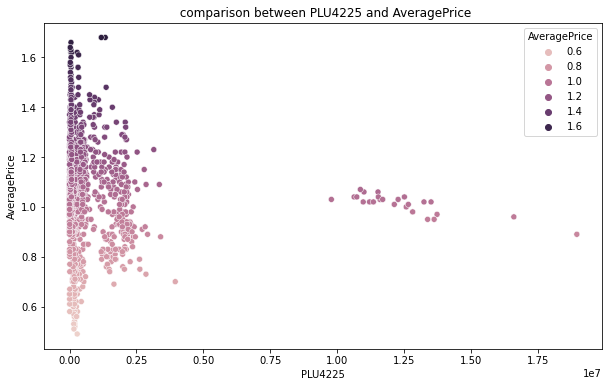

In [132]:
plt.figure(figsize=[10,6])
plt.title(' comparison between PLU4225 and AveragePrice')
sns.scatterplot(df['PLU4225'], df['AveragePrice'],hue=df['AveragePrice'])

There is  two groups of dots with maximum number of dots in left side and very minimum number of dots in right side.

<AxesSubplot:title={'center':' comparison between PLU4770  and AveragePrice'}, xlabel='PLU4770', ylabel='AveragePrice'>

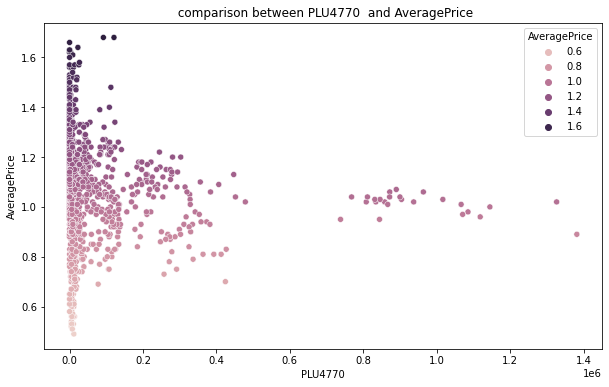

In [133]:
plt.figure(figsize=[10,6])
plt.title(' comparison between PLU4770  and AveragePrice')
sns.scatterplot(df['PLU4770'], df['AveragePrice'],hue=df['AveragePrice'])

Not much positivity with two groups of dots.

<AxesSubplot:title={'center':' comparison between Total Bags  and AveragePrice'}, xlabel='Total Bags', ylabel='AveragePrice'>

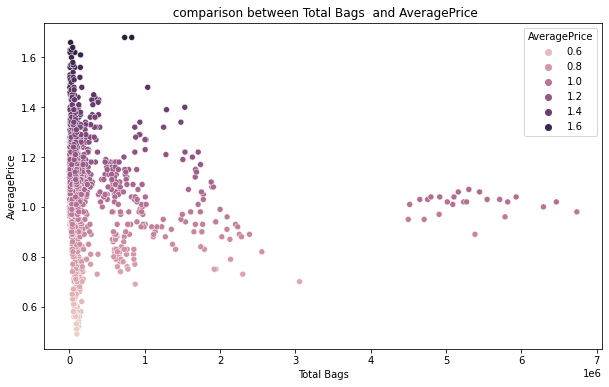

In [60]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Total Bags  and AveragePrice')
sns.scatterplot(df['Total Bags'], df['AveragePrice'],hue=df['AveragePrice'])

the comparison is very positive between range of 0 to 1 of Total bags with Average price.

<AxesSubplot:title={'center':' comparison between Small Bags  and AveragePrice'}, xlabel='Small Bags', ylabel='AveragePrice'>

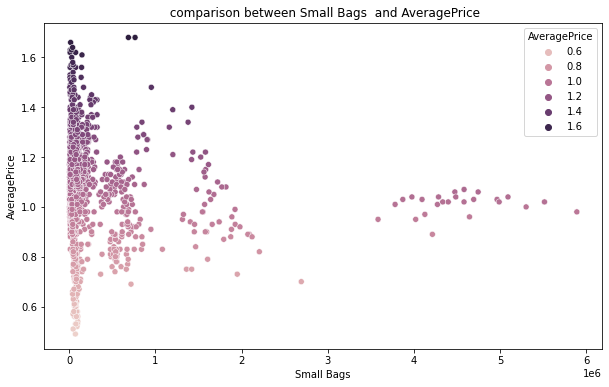

In [61]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Small Bags  and AveragePrice')
sns.scatterplot(df['Small Bags'], df['AveragePrice'],hue=df['AveragePrice'])

the comparison is  positive between range of 0 to 1 of small bags with Average price.

​

<AxesSubplot:title={'center':' comparison between XLarge Bags  and AveragePrice'}, xlabel='XLarge Bags', ylabel='AveragePrice'>

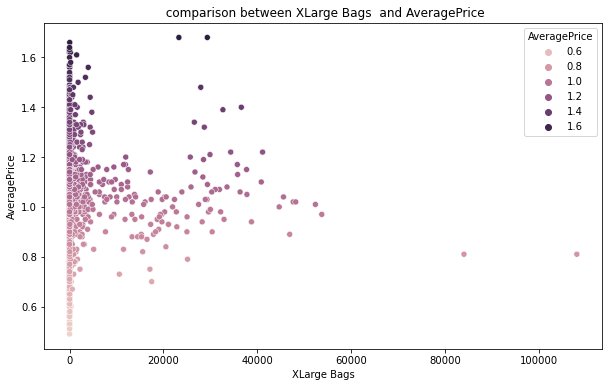

In [62]:
plt.figure(figsize=[10,6])
plt.title(' comparison between XLarge Bags  and AveragePrice')
sns.scatterplot(df['XLarge Bags'], df['AveragePrice'],hue=df['AveragePrice'])

the comparison is positive between range of 0 to 16000 of XLarge  bags with Average price.

<AxesSubplot:title={'center':' comparison between Lareg Bags  and AveragePrice'}, xlabel='Large Bags', ylabel='AveragePrice'>

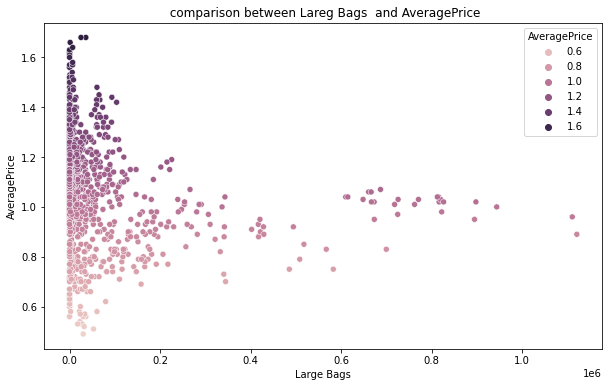

In [63]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Lareg Bags  and AveragePrice')
sns.scatterplot(df['Large Bags'], df['AveragePrice'],hue=df['AveragePrice'])

Good positive in range between 0 to 0.2 of Large Bags with AVerage Price

<AxesSubplot:title={'center':' comparison between year  and AveragePrice'}, xlabel='year', ylabel='AveragePrice'>

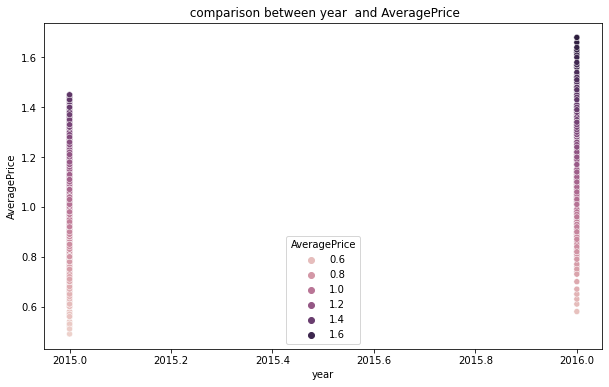

In [67]:
plt.figure(figsize=[10,6])
plt.title(' comparison between year  and AveragePrice')
sns.scatterplot(df['year'], df['AveragePrice'],hue=df['AveragePrice'])

Two years are present , 2015 and  2016 , In year 2016 average price is maximum. 

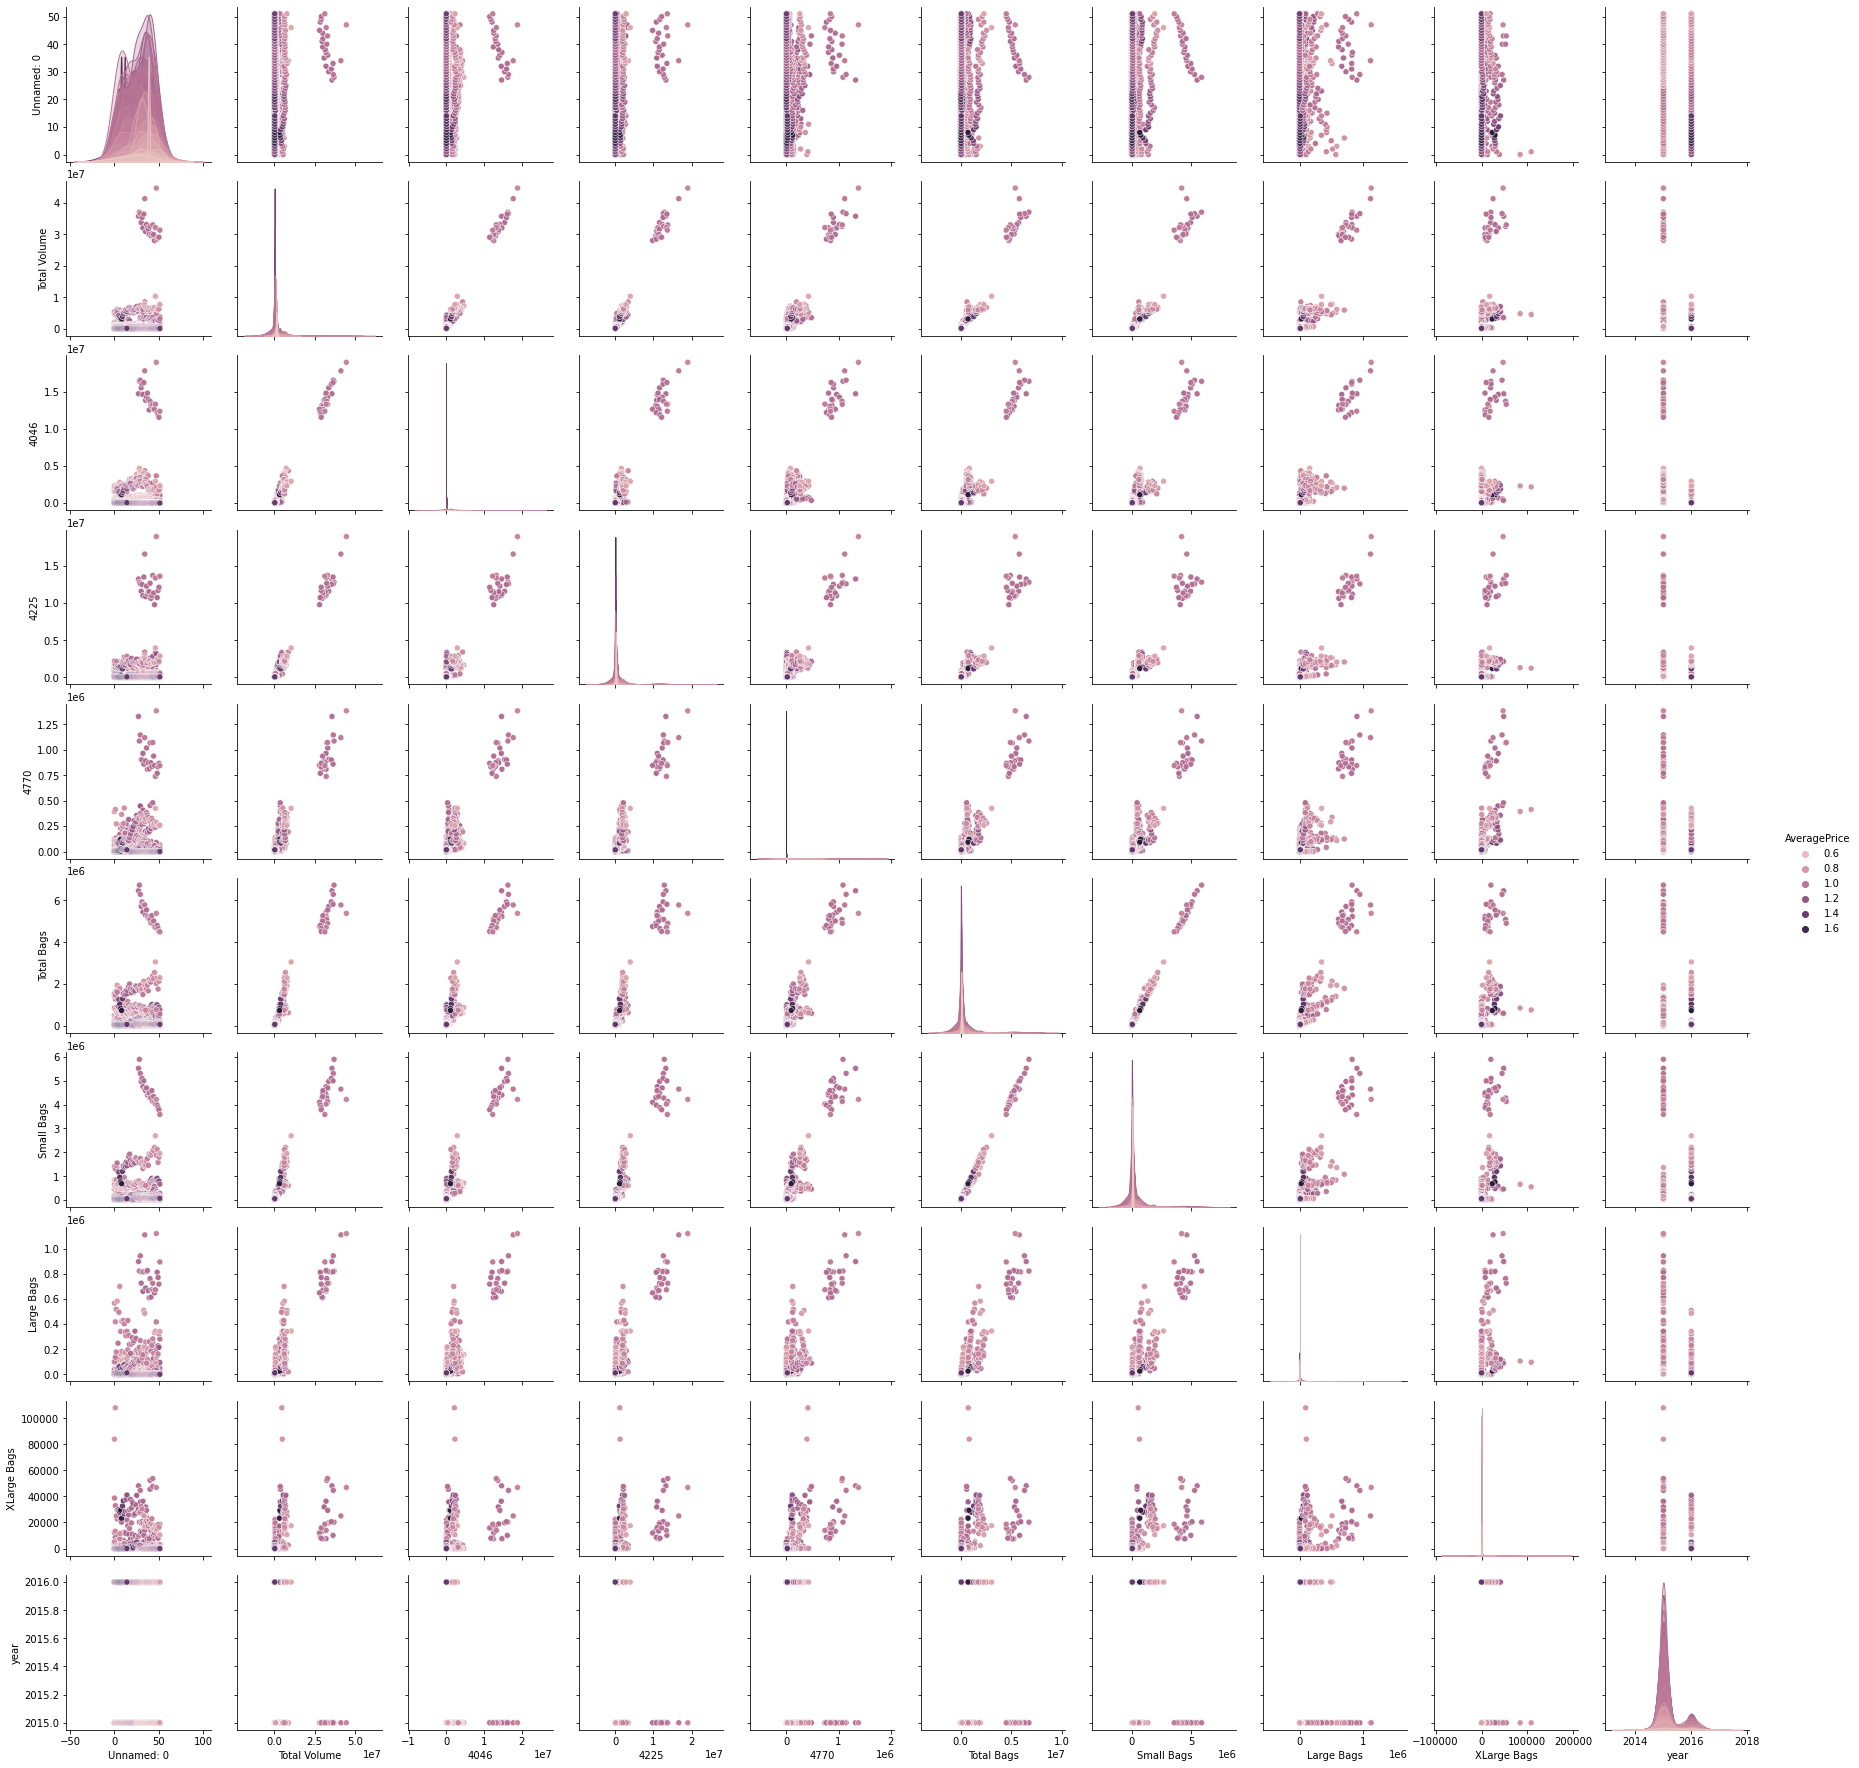

In [70]:
#pairplot visualization
sns.pairplot(df,hue='AveragePrice')

Pair plot is showing all the distributions , postivity, negativity , outliers and many more among each of the column.

# ENCODING THE DATAFRAME TO CONVERT STRING COLUMNS TO NUMERIC COLUMNS

In [71]:
from sklearn.preprocessing import LabelEncoder

In [134]:
enc=LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i])

In [135]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,92,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0
1,1,68,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0
2,2,44,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0
3,3,20,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0
4,4,98,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,53,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7
1513,11,29,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7
1514,12,5,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7
1515,13,83,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7


Now all the object type columns has been converted into numeric columns.

# CHECKING OUTLIERS THROUGH BOXPLOT

Unnamed: 0          AxesSubplot(0.125,0.71587;0.168478x0.16413)
Date             AxesSubplot(0.327174,0.71587;0.168478x0.16413)
AveragePrice     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
PLU4046            AxesSubplot(0.125,0.518913;0.168478x0.16413)
PLU4225         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
PLU4770         AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Small Bags         AxesSubplot(0.125,0.321957;0.168478x0.16413)
Large Bags      AxesSubplot(0.327174,0.321957;0.168478x0.16413)
XLarge Bags     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
type            AxesSubplot(0.731522,0.321957;0.168478x0.16413)
year                  AxesSubplot(0.125,0.125;0.168478x0.16413)
region             AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

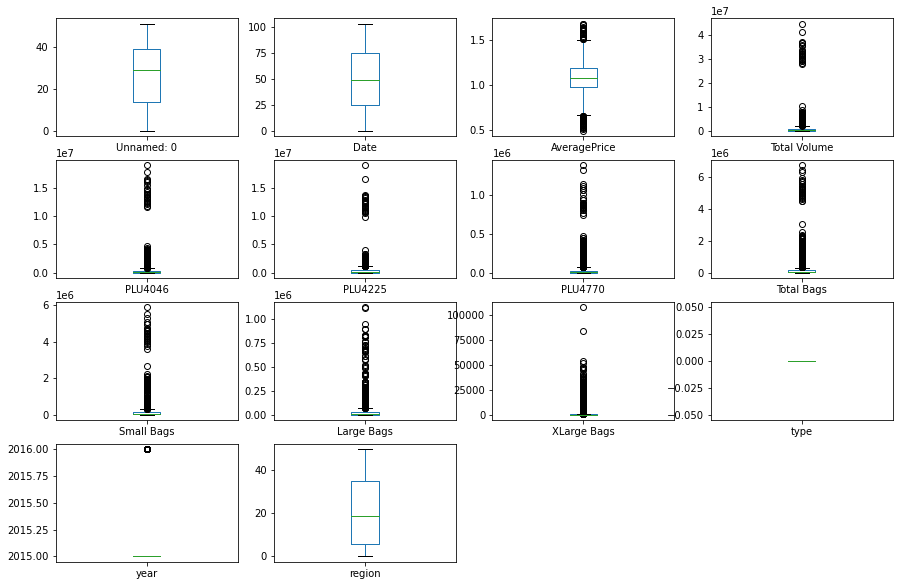

In [136]:
df.plot(kind='box', subplots=True ,layout=(4,4),figsize=(15,10))

Outliers are clearly visible in many of the columns , except 'Date','type','year' and 'region' column.

 # STATISTICAL SUMMARY

In [137]:
df.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000
mean,26.995386,50.624918,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821,21.196440
std,14.848287,30.040469,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398
min,0.000000,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000,0.000000
25%,14.000000,25.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000,6.000000
50%,29.000000,49.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000,19.000000
75%,39.000000,75.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000,35.000000
max,51.000000,103.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000,50.000000


In some of the columns there is difference between mean and median(50%) and in some column mean and median(50%) are approximately same.

In some columns there is very big difference between 75% and maximum with outliers.

 # CORRELATION MATRIX

In [138]:
cor=df.corr()
cor

,Unnamed: 0,Date,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.145600,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,NaN,-0.012854,0.012123
Date,-0.145600,1.000000,0.092984,-0.024767,-0.020773,-0.035118,-0.016382,-0.010990,-0.005656,-0.040195,0.011274,NaN,0.022750,-0.026002
AveragePrice,-0.075531,0.092984,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,0.178683,-0.229408
Total Volume,0.091934,-0.024767,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,-0.004189,0.236579
PLU4046,0.092013,-0.020773,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,-0.040439,0.269481
PLU4225,0.093566,-0.035118,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,-0.007254,0.215733
PLU4770,0.075647,-0.016382,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.029222,0.138092
Total Bags,0.081007,-0.010990,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.090108,0.190001
Small Bags,0.083485,-0.005656,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.106382,0.168650
Large Bags,0.065364,-0.040195,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,-0.018678,0.297452


<AxesSubplot:>

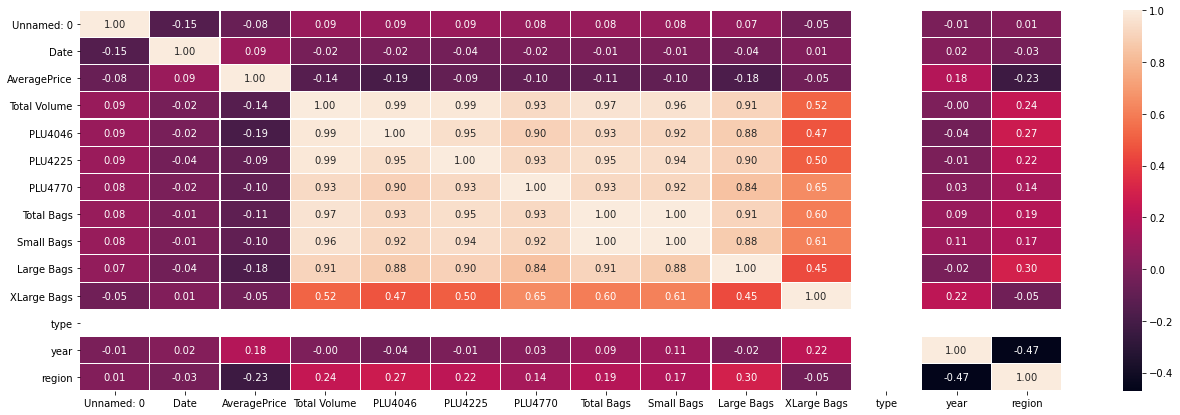

In [139]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths =0.1,fmt='0.2f')

In type column ,we have Nan values after converting it into string to numeric.

Average Price column is not showing correlation with any column.

Most of the column is showing positive correlation between eachn other.



# DROPPING UNNECESSARY COLUMNS

In [140]:
# Dropping date because year is given
df_=df.drop('Date',inplace=True,axis=1)


In [141]:
# Dropping type because all the values are Nan
df_=df.drop('type',inplace=True,axis=1)

In [142]:
df


,Unnamed: 0,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


# OUTLIER REMOVAL

In [143]:
df.shape


(1517, 12)

In [146]:
from scipy.stats import zscore


In [147]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
        1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
        1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
        1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
        1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
        1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
        1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
        1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
        1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
        1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
        1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
        1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
        1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
        1200, 1200, 1200, 1200, 1200, 

In [148]:
df_new=df[(z<3).all(axis=1)]
df_new

,Unnamed: 0,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


In [149]:
df.shape

(1517, 12)

In [150]:
df_new.shape

(1436, 12)

So 81 rows has been removed as a outliers.

# CHECKING AND REMOVING SKEWNESS

In [151]:
df_new.skew()

Unnamed: 0     -0.248948
AveragePrice   -0.184770
Total Volume    2.704085
PLU4046         3.120756
PLU4225         2.367429
PLU4770         3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
dtype: float64

columns is in range between +.5 and -.5 are not skewed.

skewed columns are:
    
    Total Volume
    
    4006
    
    4225
    
    4770
    
    Total bags
    
    Small Bags
    
    Large Bags
    
    XLarge Bags
    
    Year
    
    

In [157]:
df1_=df_new

In [158]:
df1_['Total Volume']=np.log(df_new['Total Volume'])

df1_['Total Bags']=np.log(df_new['Total Bags'])
df1_['Small Bags']=np.log(df_new['Small Bags'])
df1_['Large Bags']=np.log(df_new['Large Bags'])
df1_['Large Bags']=np.log(df_new['Total Volume'])
df1_['year']=np.log(df_new['year'])

In [155]:
df1_['PLU4046']=np.log(df_new['PLU4046'])
df1_['PLU4225']=np.log(df_new['PLU4225'])


In [160]:
df1_['PLU4770']=np.sqrt(df_new['PLU4770'])

In [162]:
df1_.skew()

Unnamed: 0     -0.248948
AveragePrice   -0.184770
Total Volume    0.462892
PLU4046        -0.270542
PLU4225         0.011274
PLU4770        -0.756600
Total Bags      0.378608
Small Bags      0.420794
Large Bags      0.269363
XLarge Bags     5.118965
year            2.004439
region          0.276276
dtype: float64

Now allmost all the skewness has been removed from the dataframe.

# SEPRATING THE COLUMNS INTO X AND Y

In [176]:
x=df1_.drop('AveragePrice',axis=1)
y=df1_['AveragePrice']

In [177]:
x.shape

(1436, 11)

In [178]:
y.shape

(1436,)

# Lets bring all features to a common scale


In [179]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(df1_)

x=pd.DataFrame(x,columns=df1_.columns)

# TRAIN TEST SPLIT

In [180]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.22, random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1120, 12)
(316, 12)
(1120,)
(316,)


# MODEL BUILDING

In [183]:
# importing libraries
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge ,ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [182]:



#for Linear Regression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 1.0
error
mean absolute error 1.554663570875417e-15
mean squared error 6.376238579249124e-28
root mean squared error 2.525121497918293e-14


In [185]:
# For Linear Regression (cross validation)


score=cross_val_score(lr,x,y,cv=10)
print('cv score',np.mean(score))


cv score 1.0


r2 score and cv score is predicting 100 % accuracy for Linear Regression.

# REGULARIZATION

In [186]:
# for Lasso

ls=Lasso()

ls.fit(x_train,y_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score -0.0006769472453624914
error
mean absolute error 0.14262974683544302
mean squared error 0.034971369462025316
root mean squared error 0.18700633535264338


In [192]:
# For Lasso (cross validation)


score=cross_val_score(ls,x,y,cv=10)
print('cv score',np.mean(score))

cv score -0.14134898753629338


r2 score and cv score is very low for Lasso.

In [188]:


#For Ridge

rd=Ridge()

rd.fit(x_train,y_train)
pred_y=rd.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))



r2 score 0.9999985719057516
error
mean absolute error 0.00017202739551810917
mean squared error 4.990862608175335e-08
root mean squared error 0.00022340238602520197


In [191]:
# For Ridge (cross  validation)


score=cross_val_score(rd,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9999982822079652


r2 score is predicting 99% and cv score is predicting 99% accuracy score for Ridge

In [193]:
#For ElasticNet



en=ElasticNet()

en.fit(x_train,y_train)
pred_y=en.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score -0.0006769472453624914
error
mean absolute error 0.14262974683544302
mean squared error 0.034971369462025316
root mean squared error 0.18700633535264338


In [194]:

#For ElasticNet (cross validation)

score=cross_val_score(en,x,y,cv=10)
print('cv score',np.mean(score))

cv score -0.14134898753629338


r2 score and cv score is very low for Elastic Net.

# CLASSIFICATION ALGORITHMS A REGRESSION MODEL


In [196]:
from sklearn.neighbors import KNeighborsRegressor

In [198]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print(knr.score(x_train,y_train))

0.9689640376552329


KNeighborsRegressor is predicting 96 % accuracy score.

In [199]:

#For KNR (cross validation)

score=cross_val_score(knr,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.7637473194626565


After cross validation KNeighborsRegressor's cv score is 76%.

# GRAPHH SHOWING THE PERFORMANCE OF MODEL

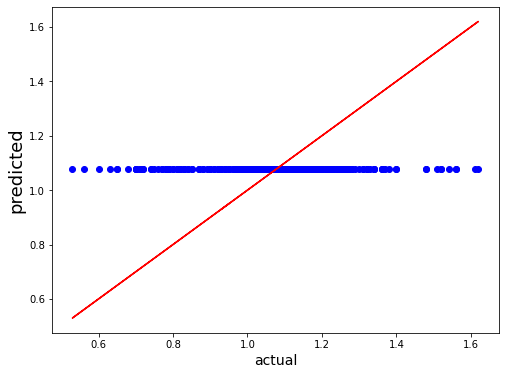

In [200]:
# Linear Regression

plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_y, color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('actual',fontsize=14)
plt.ylabel('predicted',fontsize=18)
plt.show()

Best fit line is covering most of the data points.

# ENSEMBLE TECHNIQUE

In [202]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'max_depth':[0,5]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto'}


In [203]:
rf=RandomForestRegressor(criterion='mse',max_features='auto',max_depth=5)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 score:', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

r2 score: 99.96826528035346
cross val score: 99.30173796327696


 # SAVING THE MODEL

In [204]:
import pickle
filename='avocado_avg_price.pkl'
pickle.dump(rf, open(filename, 'wb'))

 # CONCLUSION

In [206]:
loaded_model=pickle.load(open('avocado_avg_price.pkl','rb'))
result=loaded_model.score(x_test, y_test)
print(result)

0.9996826528035346


In [207]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion
                

,0,1,2,3,4,5,6,7,8,9,...,306,307,308,309,310,311,312,313,314,315
predicted,0.953348,0.755797,1.10977,1.00858,0.740487,0.968115,0.833161,1.258965,0.711312,1.219915,...,1.508126,1.360946,1.00858,1.039949,0.658513,1.161174,1.023497,1.212589,1.029873,0.931471
original,0.953348,0.755797,1.10977,1.00858,0.740487,0.968115,0.833161,1.258965,0.711312,1.219915,...,1.508126,1.360946,1.00858,1.039949,0.658513,1.161174,1.023497,1.212589,1.029873,0.931471


With the help of EDA , I learnt how to done EDA.

I also learnt ,making use of packages like matplotlib and seaborn to develop better insights of the data.

I have also learnt how to remove outliers and skewness to predict better accuracy.

I have also seen the impacts on the columns on Average Price.

I came to know through the analysis ,which model will predict better accuracy.

This project helped me to gain deep knowledge , and also get to know where to use models.

